In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0
        
    def compute(self, setpoint, pv, dt):
        error = setpoint - pv
        
        # Proportional term
        P = self.Kp * error
        
        # Integral term
        self.integral += error * dt
        I = self.Ki * self.integral
        
        # Derivative term
        derivative = (error - self.prev_error) / dt
        D = self.Kd * derivative
        
        # Save error for next derivative calculation
        self.prev_error = error
        
        # Compute output
        output = P + I + D
        
        return output

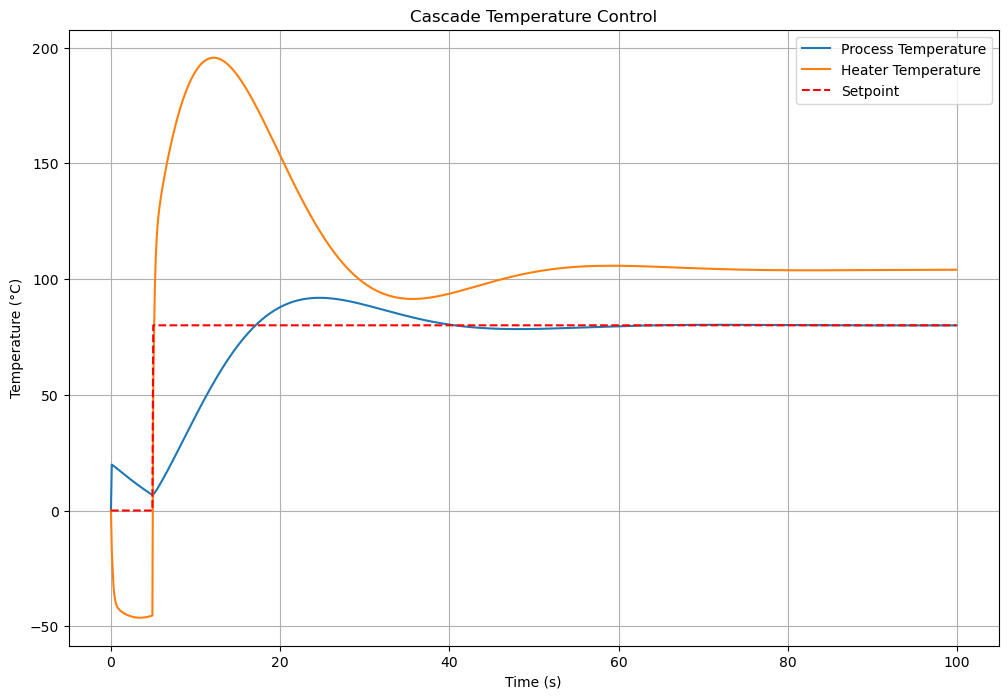

In [3]:
# Example: Cascade control for a heating system
class CascadeHeatingSystem:
    def __init__(self):
        self.temp = 20
        self.heater_temp = 20
        
    def update(self, heater_power, ambient_temp, dt):
        # Heater dynamics
        self.heater_temp += (heater_power - (self.heater_temp - ambient_temp)*0.1) * dt
        # Process dynamics
        self.temp += ((self.heater_temp - self.temp)*0.05 - (self.temp - ambient_temp)*0.02) * dt
        return self.temp, self.heater_temp

# Cascade PID controllers
inner_pid = PIDController(Kp=5, Ki=0, Kd=0.1)  # controls heater temperature
outer_pid = PIDController(Kp=2, Ki=0.5, Kd=0)  # controls process temperature

system = CascadeHeatingSystem()
dt = 0.1
total_time = 100
steps = int(total_time / dt)
time = np.arange(0, total_time, dt)
temp = np.zeros_like(time)
heater_temp = np.zeros_like(time)
setpoint = np.zeros_like(time)
setpoint[50:] = 80  # step change after 5 seconds
ambient_temp = 20

for i in range(1, len(time)):
    # Outer loop computes heater setpoint
    heater_setpoint = outer_pid.compute(setpoint[i], system.temp, dt)
    # Inner loop computes heater power
    heater_power = inner_pid.compute(heater_setpoint, system.heater_temp, dt)
    # Update system
    temp[i], heater_temp[i] = system.update(heater_power, ambient_temp, dt)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(time, temp, label='Process Temperature')
plt.plot(time, heater_temp, label='Heater Temperature')
plt.plot(time, setpoint, 'r--', label='Setpoint')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.title('Cascade Temperature Control')
plt.legend()
plt.grid(True)
plt.show()